# 데이터 수집과 라벨링
- 모델을 학습 시키기 위해 학습 데이터를 수집해야 한다.
    - 내가 해결하려는 문제를 위해 학습시킬 데이터를 **Custom Dataset**이라고 한다.
    - 수집방법
        - Open Dataset(공개 데이터셋) 이용
        - 인터넷 상의 데이터를 크롤링을 이용해 수집
        - 다양한 기기(CCTV, 다양한 IoT기기등)으로 부터 수집
- **Labeling 작업**
    - 수집한 이미지에 Label(정답)을 붙이는 작업
    - 문제 영역에 따라 Labeling 대상이 달라지며 데이터셋에 따라 다양한 format을 사용한다.
        - Object detection, segmentation 등은 Labeling Tool들을 이용해 작업한다.

# 주요 Image Open dataset

## Open Dataset이란
- 많은 국가기관, 기업, 연구소, 개인들이 머신러닝 학습을 위해 수집후 공개한 데이터셋을 말한다. 
    - 이미지, 자연어 등 다양한 분야에 다양한 데이터셋이 공개되어 있다.
    - 공개데이터셋은 데이터와 labeling 파일을 같이 제공한다.
- Image dataset의 경우 2009년 ImageNet 데이터셋 이후 다양한 단체들(연구소, 기업)에서 classification, Object Detection, segmentation, pose estimation 등 다양한 컴퓨터 비전 문제에 활용할 수 있는 Image Dataset을 제공하고 있다.


## PASCAL VOC(Visual Object Classes)
- http://host.robots.ox.ac.uk/pascal/VOC/
- 2005년에서 2012년까지 열렸던 VOC challenges 대회에서 사용한 데이터셋으로 각 대회별 데이터셋을 Open Dataset으로 제공한다.
    - 이 중 2007년도와 2012년도 이미지가 많이 쓰인다.
    - [PASCAL VOC 2007 대회 메인페이지](http://host.robots.ox.ac.uk/pascal/VOC/voc2007/index.html)
    - [PASCAL VOC 2012 대회 메인페이지](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html)
- 20개 Category
- VOC 2007: Train/Validation/Test를 위한 총 9,963개 이미지를 제공하고 이미지 내의 22,640 물체에 대한 annotate 를 제공한다.
- VOC 2012: Train/Validation/Test를 위한 총 11,530개 이미지를 제공하고 이미지 내의 27,450 물체에대한 annotate와 6,929개의 segmentation 을 제공한다.
- Annotation 파일은 xml 포멧으로 제공

### PASCAL VOC의 Category들
- 4개 그룹의 20개 Category로 구성되 있다.
1. Person: person
2. Animal: bird, cat, cow, dog, horse, sheep
3. Vehicle: aeroplane, bicycle, boat, bus, car, motorbike, train
4. Indoor: bottle, chair, dining table, potted plant, sofa, tv/monitor

## MS-COCO Dataset
- COCO (Common Objects in Context) Dataset은 object detection, segmentation, keypoint detection 등을 위한 데이터셋으로 고해상도의 33만장의 이미지와 20만개 이상의 Label을 제공한다.
- https://cocodataset.org/
- https://arxiv.org/pdf/1405.0312.pdf
- 연도별로 데이터 셋을 제공한다.
- 데이터셋을 불러오고 사용하는 것을 도와주는 pycocotools 라이브러리를 제공한다.

### 특징
- 총 80개의 category의 class들을 제공.
    - class 목록: https://gist.github.com/AruniRC/7b3dadd004da04c80198557db5da4bda
    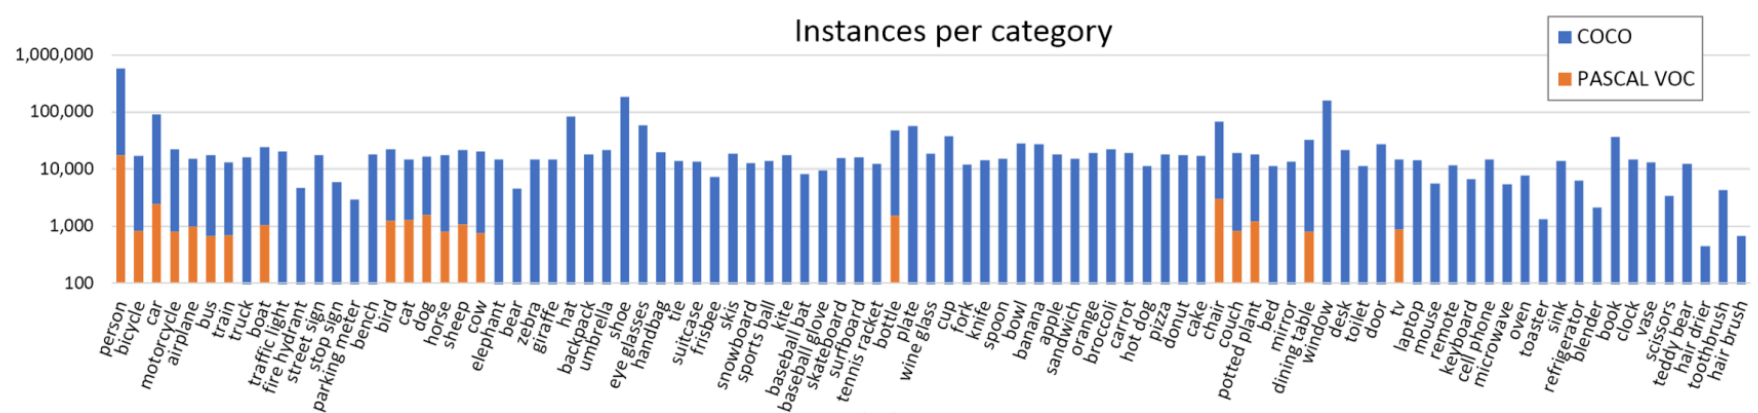


## 그외 Datasets

- Open Image Dataset
    - 구글에서 공개하는 Image Data로 현존 최대 규모 범용 이미지 데이터이다. V5 기준 600개 category에 약 9천만장의 데이터셋을 제공.
    - https://storage.googleapis.com/openimages/web/index.html
    - https://github.com/cvdfoundation/open-images-dataset

- KITTI
    - 차 주행관련 데이터셋을 제공한다.
    - http://www.cvlibs.net/datasets/kitti/

- AIHub
    - 과학기술정보통신부와 한국정보화진흥원(NIA)에 주관하는 곳으로 이미지, 텍스트, 법률, 농업, 영상, 음성 등 다양한 분야의 딥러닝 학습에 필요한 데이터를 수집 구축하고 이를 AI-Hub 를 통해 공개하고 있다. 
    - https://aihub.or.kr/
- 이외에도 다양한 단체(기업, 연구소)들에서 데이터셋을 제공한다.    

# 이미지 수집

## [Simple Image Download](https://github.com/RiddlerQ/simple_image_download) 라이브러리

- 다운받고 싶은 이미지 keyword들을 받아서 google images 에서 검색해서 다운로드해 주는 라이브러리.

### 설치
- pip 설치
    - `pip install simple-image-download==0.4`

In [1]:
!pip install simple-image-download==0.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.3/334.3 kB 1.6 MB/s eta 0:00:000:00:010:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=ac07832a664f98e4f96428bc41d3ad127834a0767a4fe9f7e526364e7a98dfec
  Stored in directory: /Users/seokminlee/Library/Caches/pip/wheels/d7/d9/89/a3f31c76ff6d51dc3b1575628f59afe59e4ceae3f2748cd7ad
Successfully built progressbar


In [3]:
from simple_image_download import simple_image_download as simp

response = simp.simple_image_download
# 개/고양이 사진을 수집
keyword = ['cat', 'dog']
for kw in keyword:
  response().download(kw,30) # cat 이미지를 구글에서 검색해서 30장 다운로드 -> dog...

[=========================================================================] 100%
[=========================================================================] 100%


## 크롬브라우저 확장
- Image Downloader
    - https://chrome.google.com/webstore/detail/image-downloader/cnpniohnfphhjihaiiggeabnkjhpaldj/related

## 영상 무료 제공 사이트

다음 사이트들은 영상에 저작권 없이 무료로 다운 받아 사용할 수 있는 사이트들
- pixcels: https://www.pexels.com/
- pixabay: https://pixabay.com/ko/
- Unsplash: https://unsplash.com/

# <span style='background-color:#fff5b1'>Labeling 과 Annotation 파일 생성


## Annotation 파일이란
- 입력데이터에 대한 **정답과 정보**를 제공하는 파일
- Image Dataset의 경우 각 이미지파일의 위치(path), 크기, bounding box의 좌표, segmentation 좌표, class name 등들을 제공한다.
    - Annotation 파일에는 여러개의 정보들이 들어간다. 그래서 그것을 묶어서 제공하기 위해 다양한 format을 사용한다.    
    - Open Dataset마다 작성 format이 다른데 **JSON**, **XML**, **CSV** 등의 형식을 사용한다.

### Annotation 예

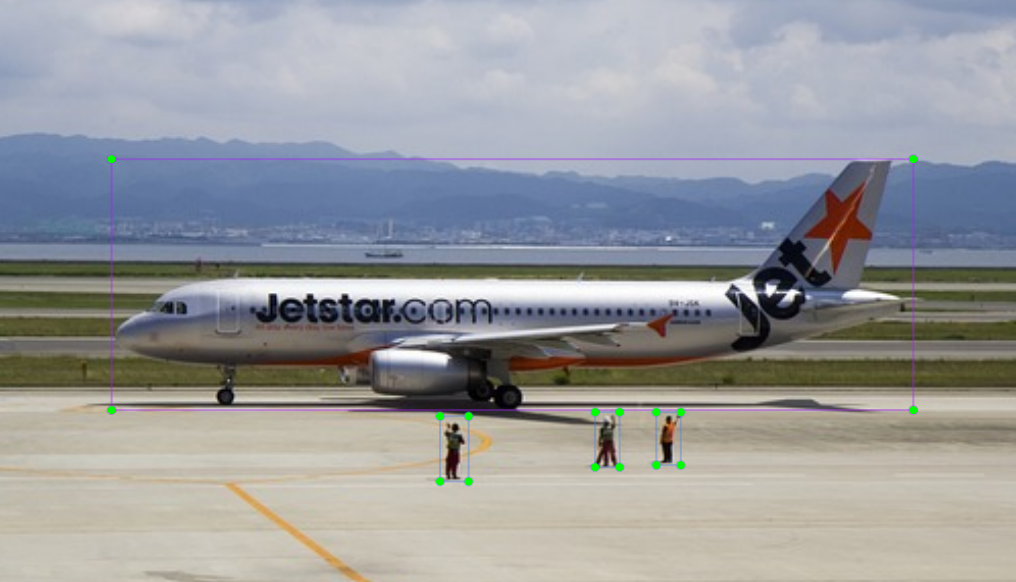

#### YOLO

```
0 0.525781 0.460187 0.614062 0.288056
1 0.481250 0.648712 0.021875 0.074941
1 0.598437 0.638173 0.018750 0.063232
1 0.645312 0.637002 0.018750 0.060890


1. 첫번째 값은 label
2. 2번째부터 5번째까지 bbox 좌표. cx / cy / w / h
```

#### Pascal VOC



```xml
<annotation>
	<folder>img</folder>
	<filename>jetstar-2657605_640.jpg</filename>
	<path>E:\Temp\img\jetstar-2657605_640.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>640</width>
		<height>427</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>airplane</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>140</xmin>
			<ymin>135</ymin>
			<xmax>533</xmax>
			<ymax>258</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>301</xmin>
			<ymin>261</ymin>
			<xmax>315</xmax>
			<ymax>293</ymax>
		</bndbox>
	</object>
    ...
</annotation>
```

## Annotation tool

- <span style='background-color:#fff5b1'><b style='font-size:1.2em'>labelme </b>
    - object detection을 위한 사각형 형태, segementation을 위한 다각형 형태등 다양한 형태의 bounding box를 그릴 수 있다.
    - <span style='background-color:#fff5b1'>설치
        `pip install labelme`
    - 실행
        - `labelme`
    - **Labelme2Yolo 라이브러리를 이용한 annotation 형식변환**
        - labelme로 작성한 annotation은 json 형식으로 저장된다. 이것을 yolo 형식으로 변환해주는 api.
        - 설치
            - `pip install labelme2yolo`
        - 실행
            - `labelme2yolo.py --json_dir  Labelme_json파일_경로`
            - 선택 파라미터
                - \-\-val_size: validation 데이터셋 크기. ex) \-\-val_size 0.2
                - \-\-test_size: test 데이터셋 크기. ex) \-\-test_size 0.2
            - 처리결과는 json_dir 아래 YOLODataset 디렉토리 아래에 생성한다.
            - ex) `labelme2yolo --json_dir c:\dataset --val_size 0.1 --test_size 0.1`
            - `labelme2yolo --val_size 0.1 --test_size 0.1`
                
            
    
- <span style='background-color:#fff5b1'><b style='font-size:1.2em'>labelimg</b>
    - object detection을 위한<span style='background-color:#fff5b1'> **사각형 형태의 bouding box을 지원한다.** Pascal VOC, YOLO, CreateML **세가지 종류의 annotation 형식을 지원한다.**
        - <span style='background-color:#fff5b1'>설치
            -`pip install labelimg`
        - 실행
            - `labelimg`
    
- <span style='background-color:#fff5b1'><b style='font-size:1.2em'>roboflow</b></span>
    - 온라인 기반 annotation tool 제공
    - 공동 작업을 지원
    - 다양한 format의 annotation방식을 지원한다.
    - 무료 계정은 작업한 내용을 공개해야 한다. <span style='background-color:#fff5b1'>**roboflow universe를**</span> 통해 많은 사람들이 작업한 프로젝트를 다운받을 수 있다.